In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 10000)

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [3]:
input_layer = Input(shape=(100,))
embedding_layer = Embedding(10000, 32)(input_layer)
LSTM_layer1 = LSTM(64, return_sequences=True)(embedding_layer)
LSTM_layer2 = LSTM(32, return_sequences=False)(LSTM_layer1)  # Change return_sequences to False
output_layer = Dense(1, activation='sigmoid')(LSTM_layer2)
model = Model(input_layer, output_layer)

In [4]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,281 (1.36 MB)

 Trainable params: 357,281 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile('rmsprop', 'binary_crossentropy', metrics=['acc'])

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data = (X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 62ms/step - acc: 0.6512 - loss: 0.5752 - val_acc: 0.7842 - val_loss: 0.4497
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - acc: 0.8660 - loss: 0.3232 - val_acc: 0.8452 - val_loss: 0.3523
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - acc: 0.8927 - loss: 0.2652 - val_acc: 0.8486 - val_loss: 0.3411
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - acc: 0.9048 - loss: 0.2452 - val_acc: 0.8347 - val_loss: 0.3765
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - acc: 0.9161 - loss: 0.2182 - val_acc: 0.8532 - val_loss: 0.3708
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - acc: 0.9266 - loss: 0.1994 - val_acc: 0.8531 - val_loss: 0.3606
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - acc: 0.9374 - loss: 0.1701 - val_acc: 0.7970 - val_loss: 0.6881
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - acc: 0.9437 - loss: 0.1559 - val_acc: 0.8481 - val_loss: 0.3782
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 

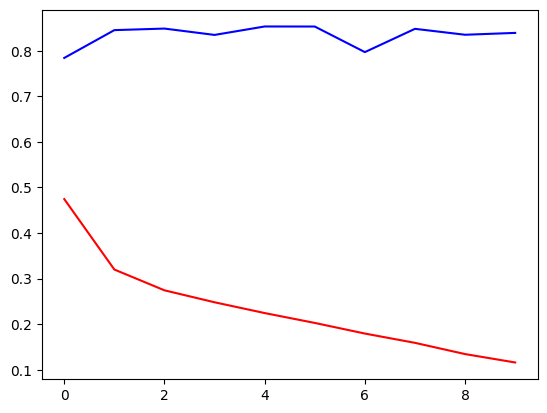

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss',color = 'red')
plt.plot(history.history['val_acc'],label = 'val_accuracy',color = 'blue')